## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

## 讀入資料

In [5]:
df_train = pd.read_csv('Titanic_train.csv')

#print(df_train.head(20))

## 觀察 Age

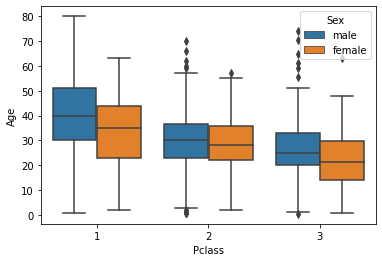

In [17]:
fig = sns.boxplot(x = df_train['Pclass'], y = df_train['Age'], hue = df_train['Sex'])


In [ ]:
# Age 和 Pclass 呈負相關


In [14]:
# check if Pclass & Sex has null value
print('Pclass null count:', df_train["Pclass"].isnull().sum())
print('Sex null count:', df_train["Sex"].isnull().sum())


Pclass null count: 0
Sex null count: 0


In [23]:
# change Sex to indexcode
#透過 preprocessing 轉換
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
new_df_train = df_train[['Pclass', 'Age', 'Sex']]
#new_df_train['Pclass'] = df_train['Pclass']
#new_df_train['Age'] = df_train['Age']
new_df_train['Sex']=le.fit_transform(new_df_train['Sex'])


<ipython-input-23-e974bfe08fdd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_train['Sex']=le.fit_transform(new_df_train['Sex'])


In [25]:
from sklearn.metrics.pairwise import nan_euclidean_distances
#display(pd.DataFrame(nan_euclidean_distances(new_df_train)))
# KNN
value_neighbors=3
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors)
df_filled = pd.DataFrame(imputer.fit_transform(new_df_train))

#display(df_filled)

In [28]:
print(new_df_train.describe())
print(df_filled.describe())

           Pclass         Age         Sex
count  891.000000  714.000000  891.000000
mean     2.308642   29.699118    0.647587
std      0.836071   14.526497    0.477990
min      1.000000    0.420000    0.000000
25%      2.000000   20.125000    0.000000
50%      3.000000   28.000000    1.000000
75%      3.000000   38.000000    1.000000
max      3.000000   80.000000    1.000000
                0           1           2
count  891.000000  891.000000  891.000000
mean     2.308642   28.530681    0.647587
std      0.836071   13.727408    0.477990
min      1.000000    0.420000    0.000000
25%      2.000000   19.666667    0.000000
50%      3.000000   26.000000    1.000000
75%      3.000000   36.000000    1.000000
max      3.000000   80.000000    1.000000


In [ ]:
# 補值後整體資料屬性並未差距太大
